In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Dataset/Billionaire.csv')
data

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


In [3]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

In [6]:
data['NetWorth'] = data['NetWorth'].str.strip('$')
data['NetWorth'] = data['NetWorth'].str.strip('B')
data['NetWorth'] = data['NetWorth'].astype(float)

data

c:\Users\FrsCo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\FrsCo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\FrsCo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1.0,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,1.0,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,1.0,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,1.0,China,conglomerate,2674,58.0,Diversified


In [7]:
df = data.sort_values(by=['NetWorth'],ascending=False).head(10).reset_index() #kam be ziyad

df

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


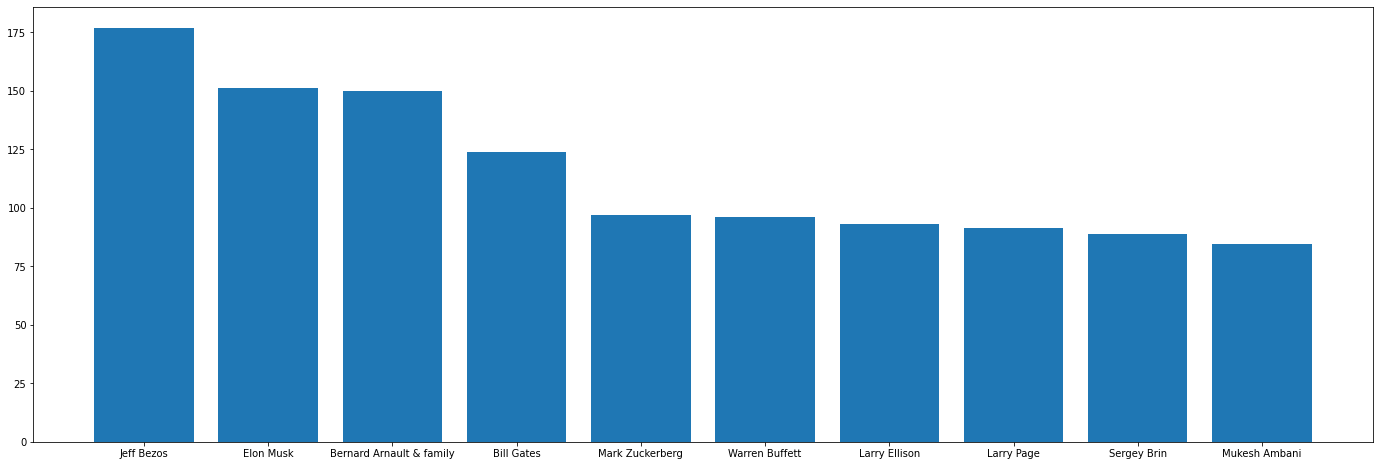

In [8]:
plt.figure(figsize=(24,8))
plt.bar(df['Name'],df['NetWorth'])
plt.show()

In [9]:
df = data['Source'].value_counts().rename_axis('Source').to_frame('counts').head(10).reset_index()


df

,Source,counts
0,real estate,169
1,pharmaceuticals,96
2,investments,89
3,diversified,78
4,software,61
5,retail,44
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


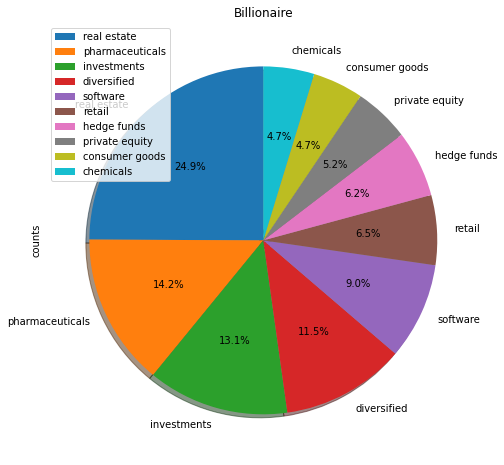

In [10]:
df.plot.pie(y="counts", figsize = (8, 8), labels=df['Source'],autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Billionaire')
plt.show()

In [11]:
df = data['Industry'].value_counts().rename_axis('Industry').to_frame('counts').reset_index()

df

,Industry,counts
0,Finance & Investments,365
1,Technology,355
2,Manufacturing,317
3,Fashion & Retail,268
4,Healthcare,213
5,Real Estate,211
6,Food & Beverage,204
7,Diversified,180
8,Energy,99
9,Media & Entertainment,92


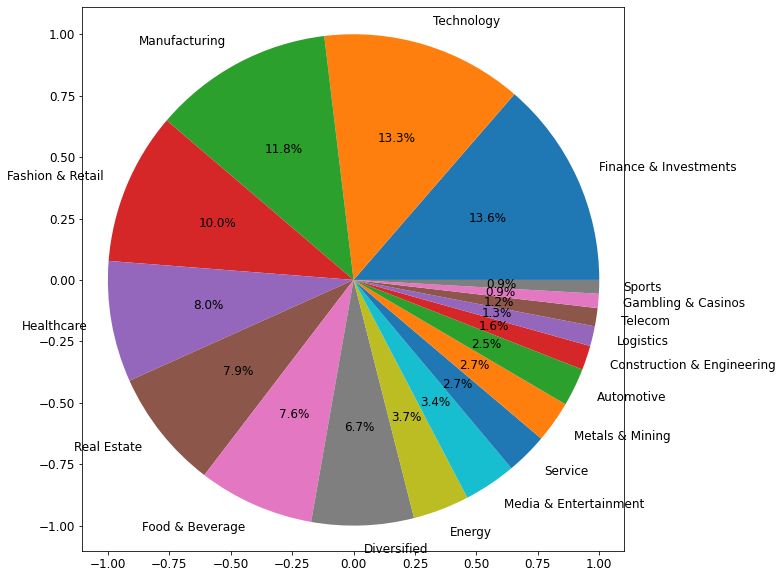

In [12]:
plt.figure(figsize=(12,10))
plt.rcParams['font.size'] = 12.0
plt.pie(df['counts'], labels=df['Industry'],autopct='%1.1f%%',frame=True)
plt.show()

In [13]:
df = data['Country'].value_counts().rename_axis('Country').to_frame('counts').head().reset_index()
df

,Country,counts
0,United States,720
1,China,610
2,India,134
3,Russia,118
4,Germany,115


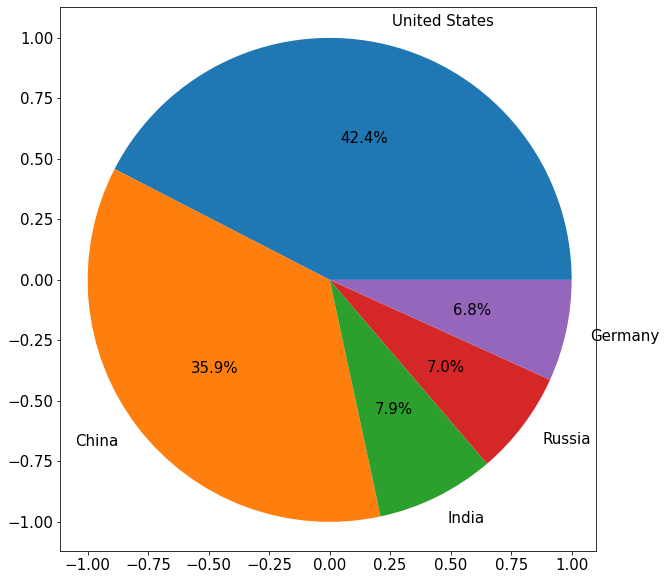

In [14]:
plt.figure(figsize=(12,10))
plt.rcParams['font.size'] = 15.0
plt.pie(df['counts'], labels=df['Country'],autopct='%1.1f%%',frame=True)
plt.show()

In [15]:
mean_age = data['Age'].mean()
variance_age = data['Age'].var()
mean_age
variance_age

180.7721364011008

In [16]:
df = data.groupby(['Country'])['NetWorth'].sum().reset_index()

df

,Country,NetWorth
0,Algeria,4.8
1,Argentina,9.2
2,Australia,176.7
3,Austria,62.7
4,Belgium,12.6
...,...,...
65,United Kingdom,196.5
66,United States,4384.7
67,Venezuela,3.2
68,Vietnam,16.7


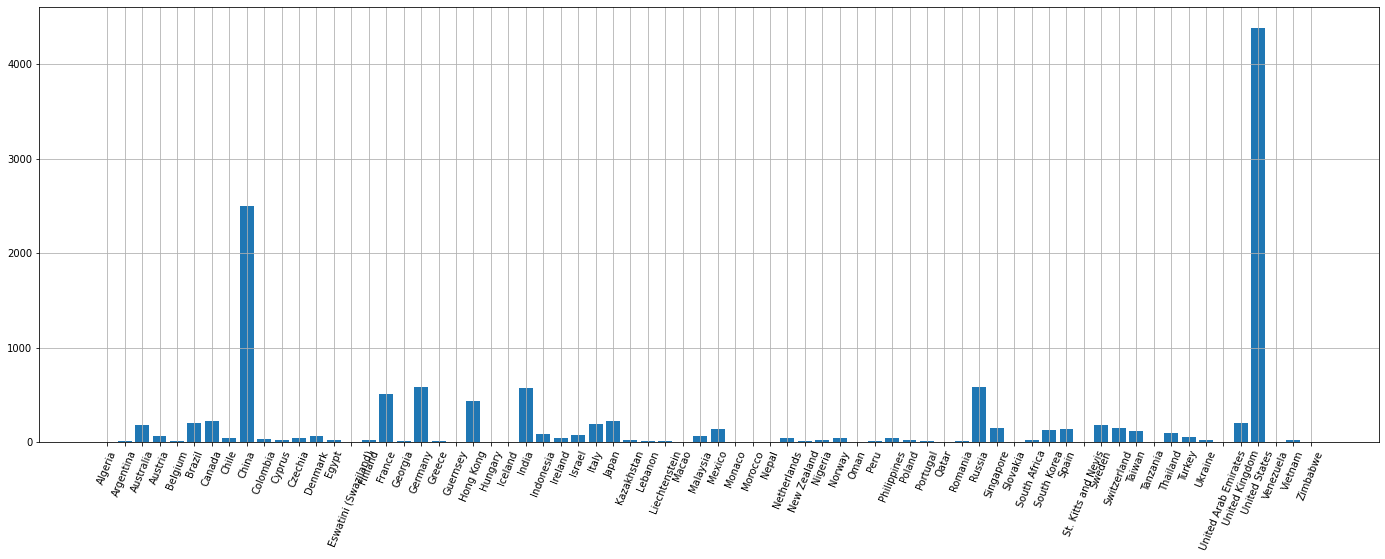

In [17]:
plt.figure(figsize=(24,8))
plt.rcParams['font.size'] = 10.0
plt.grid()
plt.xticks(rotation = 68)
plt.bar(df['Country'],df['NetWorth'])
plt.show()

In [18]:
df = data.query("Country=='United States'").head(10).reset_index(drop=True)
df

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
3,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
4,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
5,Larry Ellison,93.0,United States,software,7,76.0,Technology
6,Larry Page,91.5,United States,Google,8,48.0,Technology
7,Sergey Brin,89.0,United States,Google,9,47.0,Technology
8,Steve Ballmer,68.7,United States,Microsoft,14,65.0,Technology
9,Alice Walton,61.8,United States,Walmart,17,71.0,Fashion & Retail


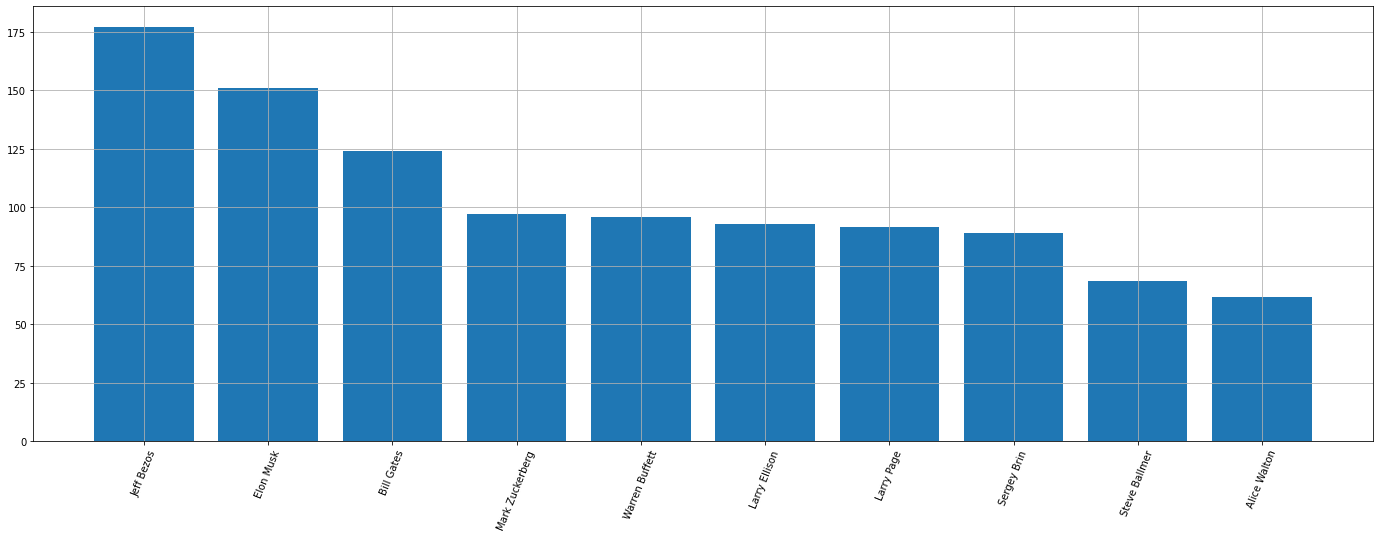

In [19]:
plt.figure(figsize=(24,8))
plt.rcParams['font.size'] = 10.0
plt.grid()
plt.xticks(rotation = 68)
plt.bar(df['Name'],df['NetWorth'])
plt.show()

In [20]:
df = data['Country'].value_counts().rename_axis('Country').to_frame('counts').tail(10).reset_index()
df

,Country,counts
0,Tanzania,1
1,Guernsey,1
2,Oman,1
3,United Arab Emirates,1
4,Macao,1
5,Venezuela,1
6,Eswatini (Swaziland),1
7,Algeria,1
8,Liechtenstein,1
9,Nepal,1


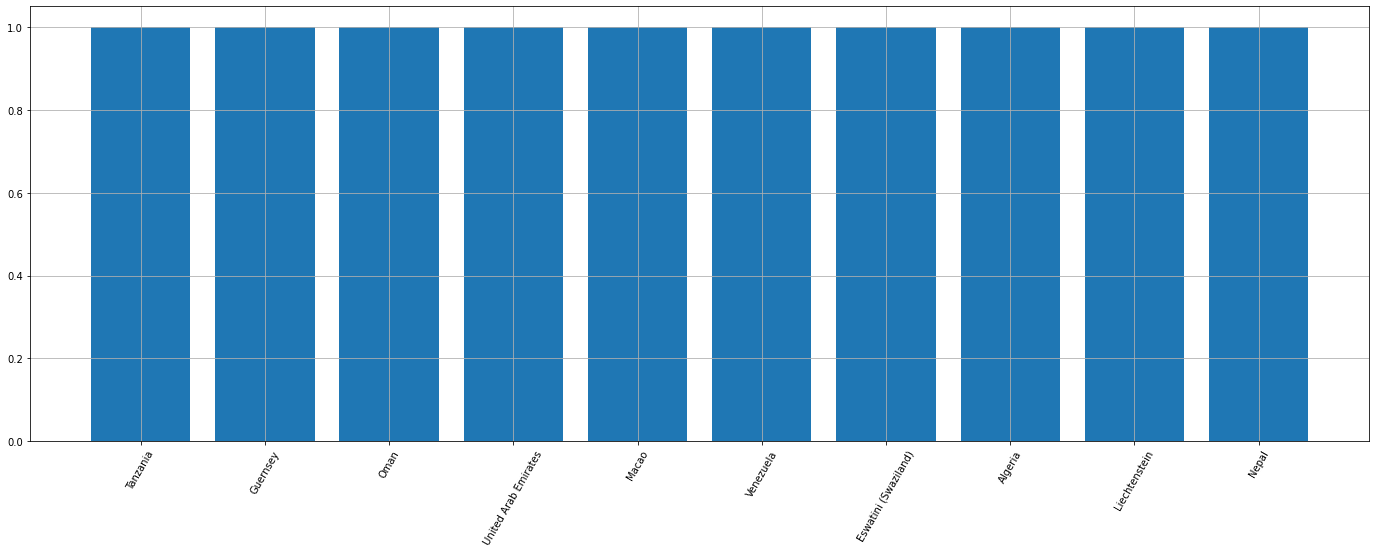

In [21]:
plt.figure(figsize=(24,8))
plt.rcParams['font.size'] = 10.0
plt.grid()
plt.xticks(rotation = 60)
plt.bar(df['Country'],df['counts'])
plt.show()